# Mushroom Fungi Classification

# Importing Libraries

In [218]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [219]:
df=pd.read_csv("Mashroomdata1.csv")

# Importing Data file

# Examining the Dataset

In [220]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [222]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [223]:
print("Dataset shape:", df.shape)

Dataset shape: (8124, 23)


In [224]:
df['class'].value_counts() # count values of edible and poisonous values

e    4208
p    3916
Name: class, dtype: int64

In [225]:
df["class"].unique()

array(['p', 'e'], dtype=object)

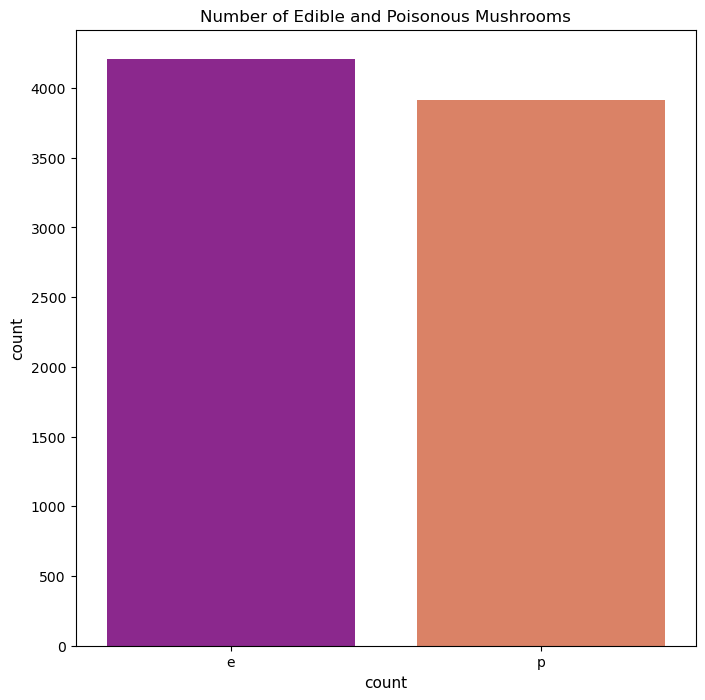

In [226]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
count =df['class'].value_counts()
plt.figure(figsize=(8,8))
sns.barplot(count.index,count.values,alpha=1,palette="plasma")
plt.ylabel('count',fontsize=11)
plt.xlabel('count',fontsize=11)
plt.title('Number of Edible and Poisonous Mushrooms')
plt.show()

In [227]:
# use laberencoder to convert data in ordinal form

df=df.astype('category')


In [228]:
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [229]:
LabelEncoder=LabelEncoder()
for column in df.columns:
    df[column]=LabelEncoder.fit_transform(df[column])

In [230]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Pre-Processing of Dataset

In [231]:
# veil-type  have null vaues so for results accuracy I remove it.
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [232]:
df=df.drop(["veil-type"], axis=1)

# Characteristics of Dataset

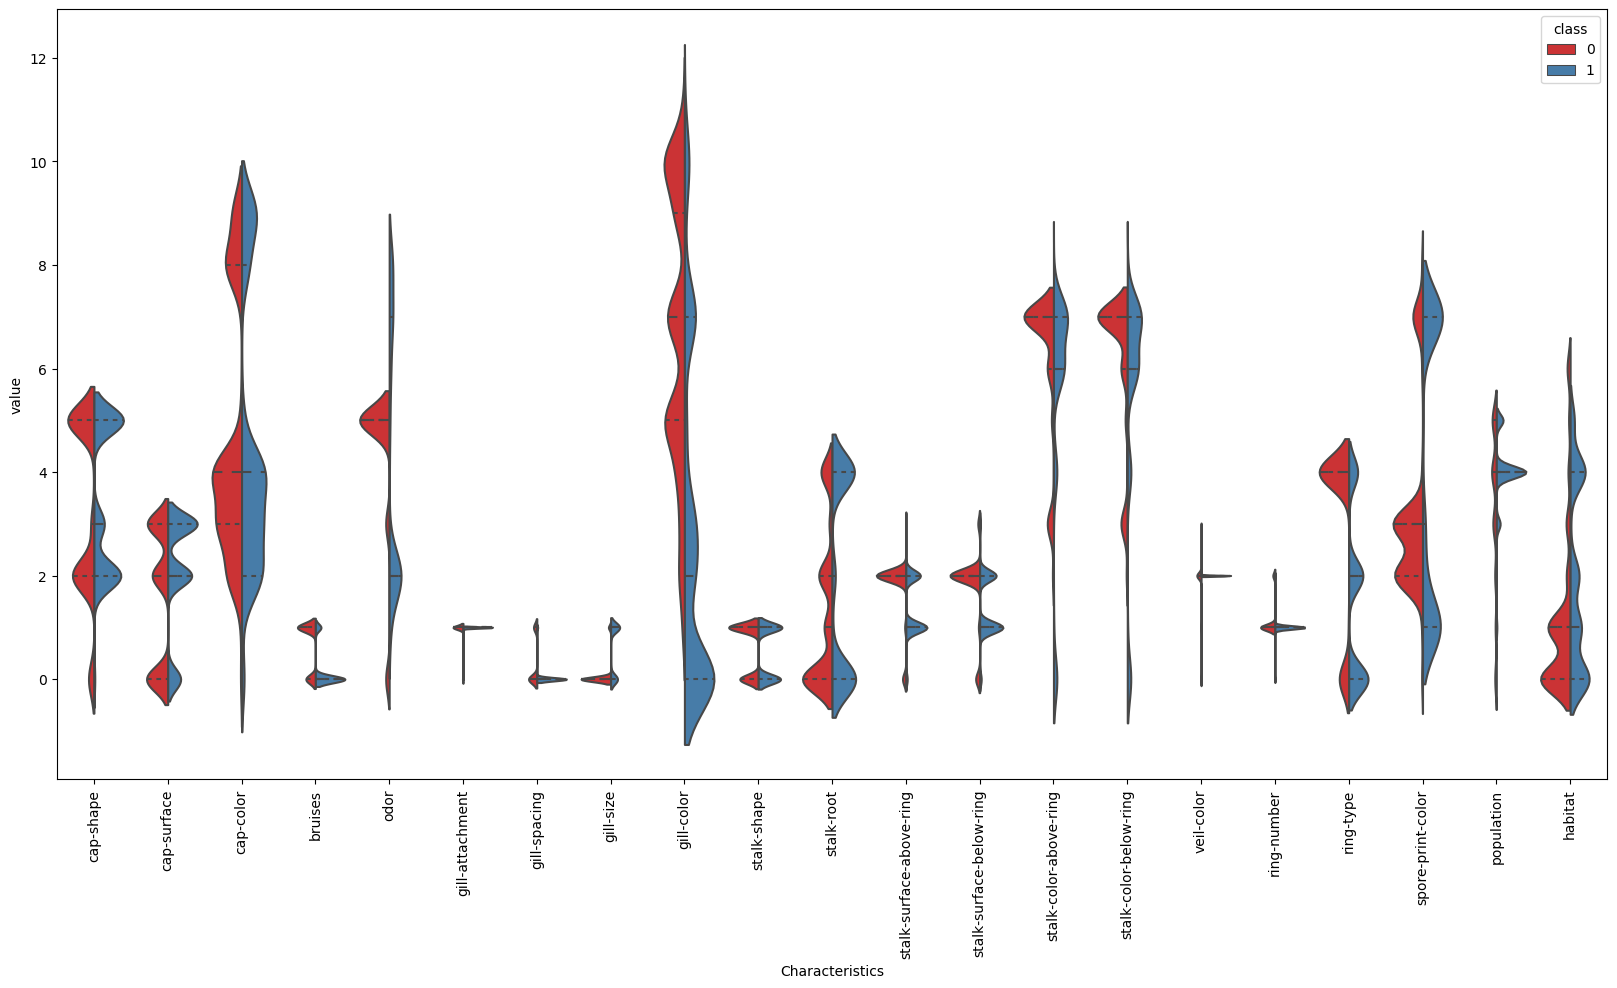

In [233]:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(20,10))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

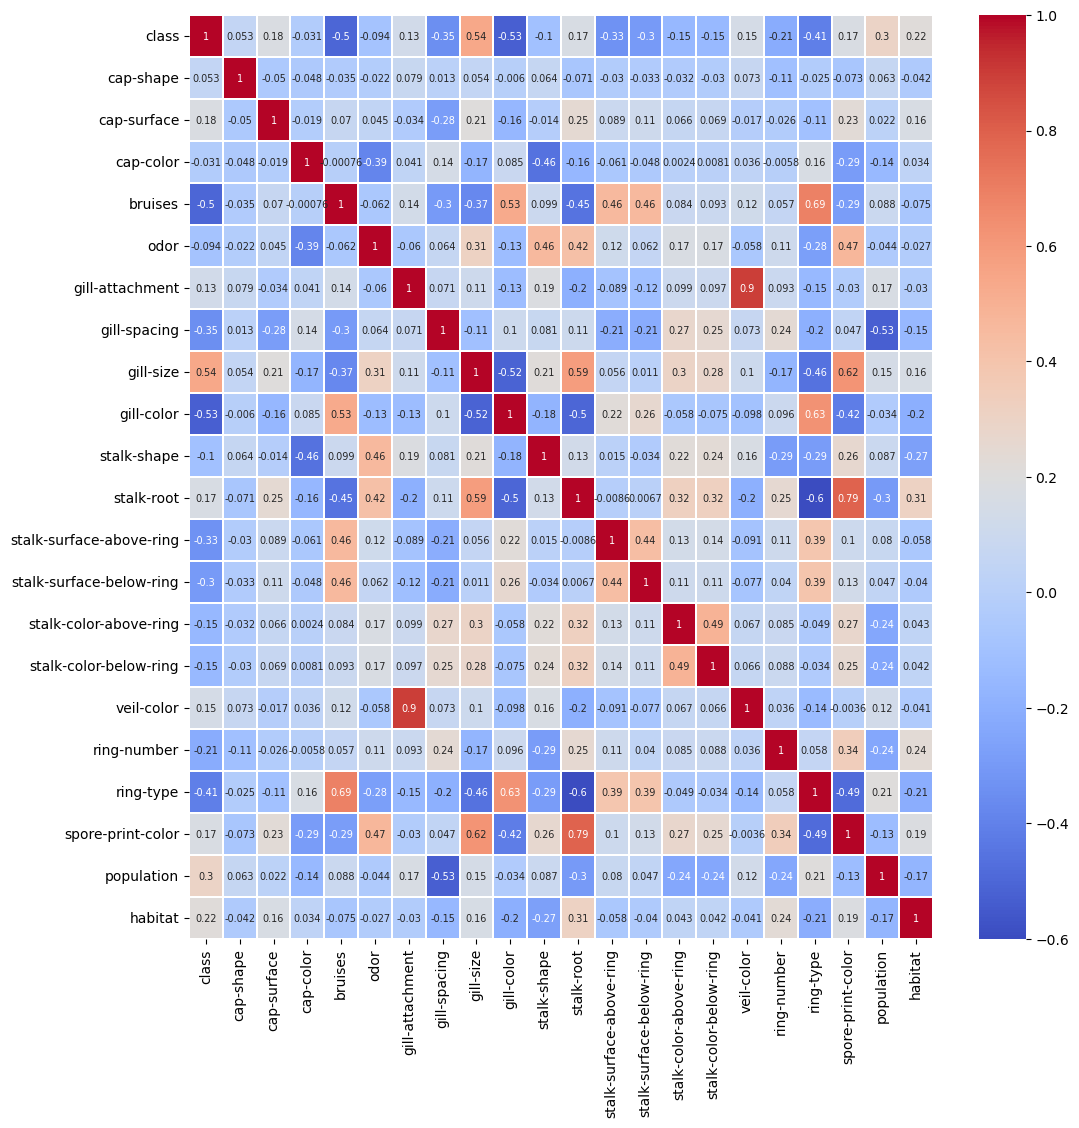

In [234]:
# Correlation between the variables
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="coolwarm", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

# Splitting Dataset

In [235]:
x=df.drop(['class'],axis=1)
y=df["class"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3,random_state=42)

# Classification Algorithms

# 1:Logistic Regression Classifier

In [236]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(x_test, y_test)*100,2)))

Test Accuracy: 94.97%


In [237]:
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2905
           1       0.95      0.95      0.95      2782

    accuracy                           0.95      5687
   macro avg       0.95      0.95      0.95      5687
weighted avg       0.95      0.95      0.95      5687



# Confusion Matrix

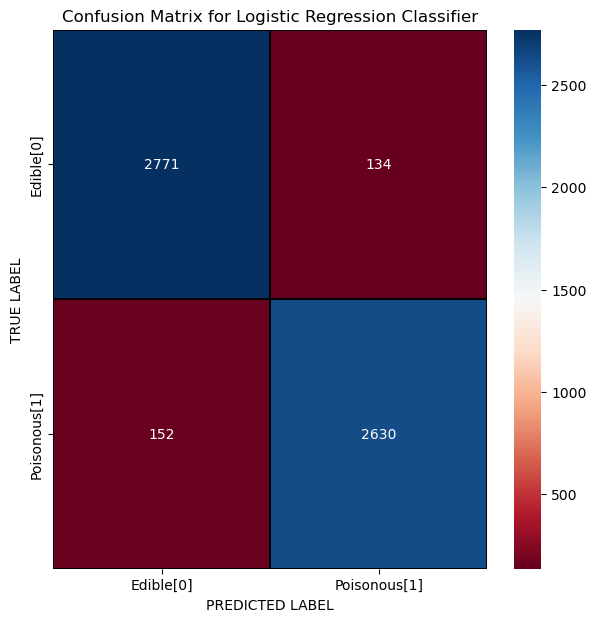

In [238]:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible[0]", "Poisonous[1]"]
y_axis_labels = ["Edible[0]", "Poisonous[1]"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="RdBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

# 2:Support vector Machine Classifiers

In [239]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(x_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [240]:
y_pred_svm = svm.predict(x_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2905
           1       1.00      1.00      1.00      2782

    accuracy                           1.00      5687
   macro avg       1.00      1.00      1.00      5687
weighted avg       1.00      1.00      1.00      5687



# Confusion Matrix

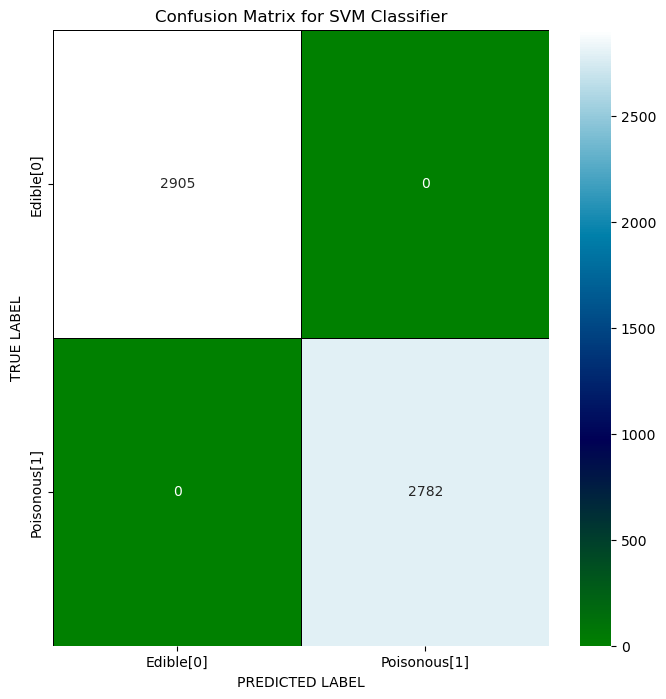

In [241]:
cm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible[0]", "Poisonous[1]"]
y_axis_labels = ["Edible[0]", "Poisonous[1]"]
f, ax = plt.subplots(figsize =(8,8))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

# 3: K-Nearest Neighbor Classifier

In [242]:
from sklearn.neighbors import KNeighborsClassifier

In [243]:
k = 50  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=50)

# Accuracy Evaluation

In [244]:
from sklearn import metrics
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks): 
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.99894496, 0.99595569, 0.99683489, 0.99331809, 0.99419729,
       0.99191138, 0.99173554, 0.98927378, 0.98997714, 0.98610867,
       0.98628451, 0.98382275, 0.98347107, 0.981361  , 0.98171268,
       0.97925092, 0.97696501, 0.97538245, 0.97590997, 0.97309654,
       0.9729207 , 0.96852471, 0.96905222, 0.96553543, 0.96535959,
       0.95973272, 0.95990856, 0.95744681, 0.95832601, 0.95744681,
       0.95832601, 0.95674345, 0.95709513, 0.95357834, 0.95516089,
       0.95234746, 0.95393002, 0.95269914, 0.9542817 , 0.95217162,
       0.9534025 , 0.9516441 , 0.9516441 , 0.94918235, 0.95041322,
       0.94724811, 0.94812731, 0.94548971, 0.94619307])

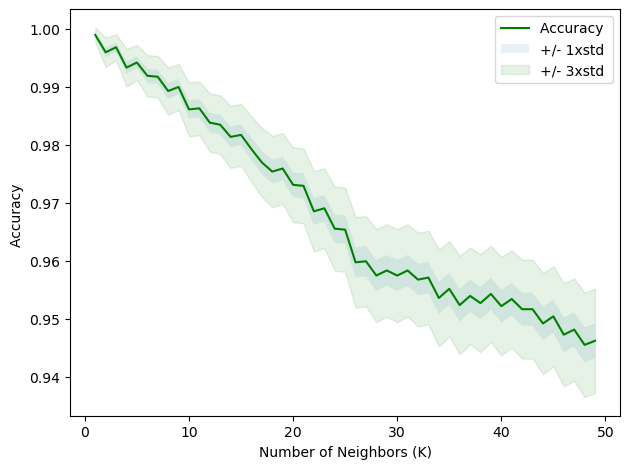

In [245]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [246]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9474764054164957
Test set Accuracy:  0.9461930719184104


# Confusion Matrix for KNN classifier

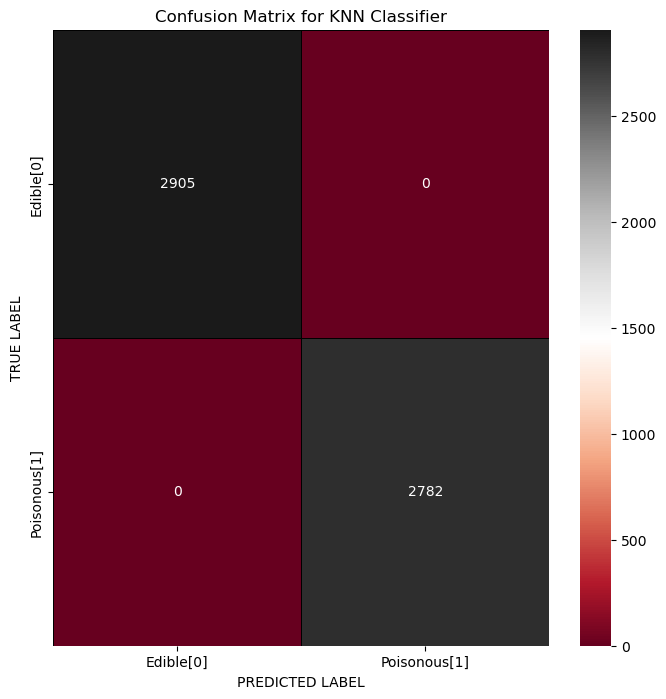

In [247]:
m = confusion_matrix(y_test, yhat)
x_axis_labels = ["Edible[0]", "Poisonous[1]"]
y_axis_labels = ["Edible[0]", "Poisonous[1]"]
f, ax = plt.subplots(figsize =(8,8))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="black", fmt = ".0f", ax=ax, cmap="RdGy", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# 4:Naive Bayes Classifier

In [248]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [249]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [250]:
y_pred = nb.predict(x_test)

In [251]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9231580798311939


In [252]:
y_pred_nb = nb.predict(x_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.93      0.92      0.92      2905
           1       0.92      0.92      0.92      2782

    accuracy                           0.92      5687
   macro avg       0.92      0.92      0.92      5687
weighted avg       0.92      0.92      0.92      5687



# Confusion Matrix of Naive Bayes classifier

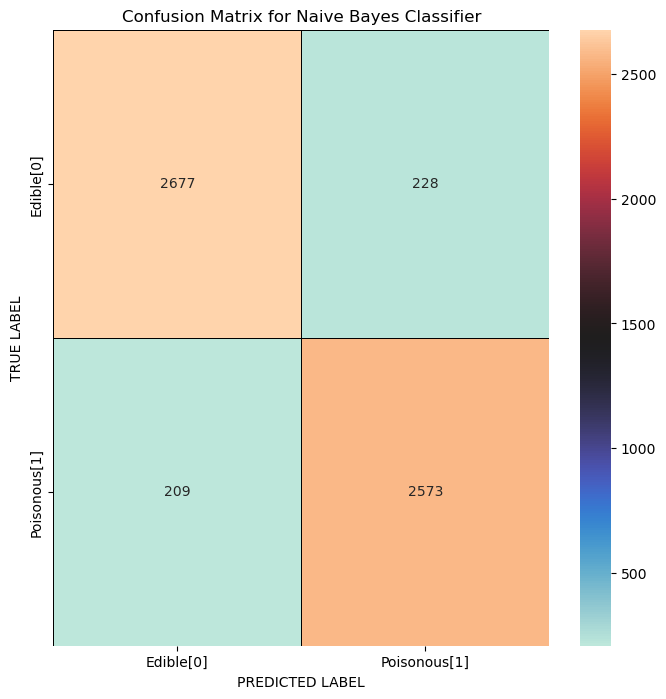

In [253]:
cm = confusion_matrix(y_test, y_pred_nb)
x_axis_labels = ["Edible[0]", "Poisonous[1]"]
y_axis_labels = ["Edible[0]", "Poisonous[1]"]
f, ax = plt.subplots(figsize =(8,8))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="black", fmt = ".0f", ax=ax, cmap="icefire", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

# 5:Random Forest Classifier

In [254]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [255]:
y_pred = rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# Confusion Matrix for Random Forest 

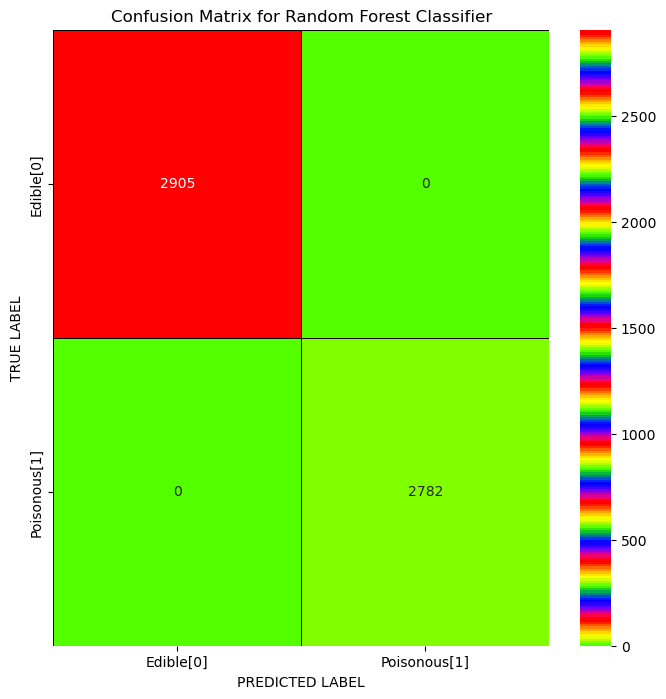

In [256]:
cm = confusion_matrix(y_test, y_pred)
x_axis_labels = ["Edible[0]", "Poisonous[1]"]
y_axis_labels = ["Edible[0]", "Poisonous[1]"]
f, ax = plt.subplots(figsize =(8,8))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="black", fmt = ".0f", ax=ax, cmap="prism_r", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
plt.show()

# Classification Report

In [257]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2905
           1       1.00      1.00      1.00      2782

    accuracy                           1.00      5687
   macro avg       1.00      1.00      1.00      5687
weighted avg       1.00      1.00      1.00      5687



# 6:Decision Tree Classifier

In [258]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)

In [259]:
decisiontree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [260]:
predTree = decisiontree.predict(x_test)

In [261]:
print (predTree [0:20])
print (y_test [0:20])

[0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0]
1971    0
6654    1
5606    1
3332    0
6988    1
5761    1
5798    1
3064    1
1811    0
3422    0
3555    0
5317    1
706     0
1075    0
233     0
3480    0
1557    0
7634    1
828     0
2534    0
Name: class, dtype: int32


In [262]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9117285036047125


In [263]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()
clf.fit(x, y)

DecisionTreeClassifier()

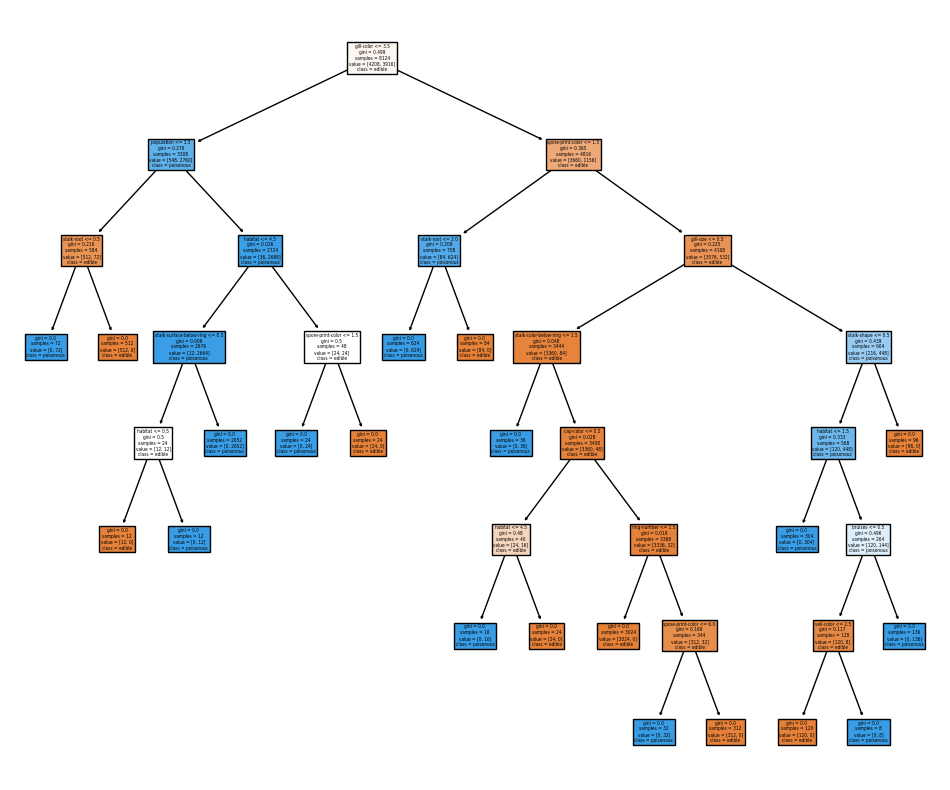

In [264]:
feature_names = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
fig, ax = plt.subplots(figsize=(12, 10))
plot_tree(clf, ax=ax, feature_names=feature_names, class_names=['edible', 'poisonous'], filled=True)
plt.show()

# Confusion Matrix for Decision Tree

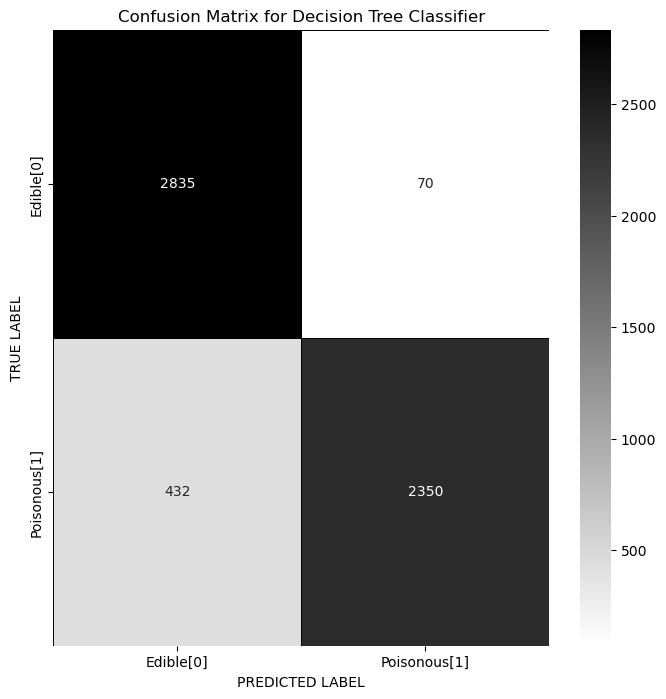

In [265]:
cm = confusion_matrix(y_test, predTree)
x_axis_labels = ["Edible[0]", "Poisonous[1]"]
y_axis_labels = ["Edible[0]", "Poisonous[1]"]
f, ax = plt.subplots(figsize =(8,8))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="black", fmt = ".0f", ax=ax, cmap="gray_r", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Classification Report for Decision Tree

In [266]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2905
           1       1.00      1.00      1.00      2782

    accuracy                           1.00      5687
   macro avg       1.00      1.00      1.00      5687
weighted avg       1.00      1.00      1.00      5687



# Predictions

In [268]:
predTree =decisiontree.predict(x_test)
print(predTree[:50])
print(y_test[:50].values)
# 0 - Edible
# 1 - Poisonous

[0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0
 1 1 1 1 0 1 0 1 0 0 0 1 0]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0
 1 1 1 1 0 1 0 1 0 1 0 1 0]


Predicted and true values are same.

# As we can see Desision tree and Random forest are the most accurate algorithms which give 100% accuracy.